In [1]:
import pandas as pd

# Load train.csv without header, assign column names explicitly
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\week4\data\train.csv', header=None, names=['polarity', 'title', 'review'])

# Check the first few rows to confirm loading
print(df.head())

# Check the distribution of polarity values
print(df['polarity'].value_counts())


   polarity                                              title  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                              review  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  
polarity
2    1800000
1    1800000
Name: count, dtype: int64


In [2]:
# Keep only polarity 1 (negative) and 2 (positive)
df = df[df['polarity'].isin([1, 2])]

# Drop rows with missing review text
df = df.dropna(subset=['review'])

# Check new shape and polarity distribution
print(f"Filtered dataset shape: {df.shape}")
print(df['polarity'].value_counts())


Filtered dataset shape: (3600000, 3)
polarity
2    1800000
1    1800000
Name: count, dtype: int64


In [3]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"[^a-z0-9\s.,!?']", " ", text)  # Keep only basic punctuation and alphanumerics
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [4]:
df['cleaned_review'] = df['review'].apply(clean_text)

# Check a few cleaned reviews
print(df[['review', 'cleaned_review']].head())


                                              review  \
0  This sound track was beautiful! It paints the ...   
1  I'm reading a lot of reviews saying that this ...   
2  This soundtrack is my favorite music of all ti...   
3  I truly like this soundtrack and I enjoy video...   
4  If you've played the game, you know how divine...   

                                      cleaned_review  
0  this sound track was beautiful! it paints the ...  
1  i'm reading a lot of reviews saying that this ...  
2  this soundtrack is my favorite music of all ti...  
3  i truly like this soundtrack and i enjoy video...  
4  if you've played the game, you know how divine...  


In [5]:
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

print(df[['cleaned_review', 'review_length']].head())
print(f"\nReview length stats:\n{df['review_length'].describe()}")


                                      cleaned_review  review_length
0  this sound track was beautiful! it paints the ...             74
1  i'm reading a lot of reviews saying that this ...             91
2  this soundtrack is my favorite music of all ti...            130
3  i truly like this soundtrack and i enjoy video...            114
4  if you've played the game, you know how divine...             77

Review length stats:
count    3.600000e+06
mean     7.473594e+01
std      4.271340e+01
min      0.000000e+00
25%      3.900000e+01
50%      6.600000e+01
75%      1.040000e+02
max      2.540000e+02
Name: review_length, dtype: float64


In [6]:
df['length_bin'] = pd.qcut(df['review_length'], q=5, labels=False)

print(df[['review_length', 'length_bin']].head(10))
print("\nLength bin counts:")
print(df['length_bin'].value_counts())


   review_length  length_bin
0             74           2
1             91           3
2            130           4
3            114           3
4             77           2
5            144           4
6            143           4
7            103           3
8             99           3
9             58           2

Length bin counts:
length_bin
0    741168
3    721835
2    718497
4    716273
1    702227
Name: count, dtype: int64


In [7]:
sample_size = 800000  # total samples after sampling
n_bins = df['length_bin'].nunique()
samples_per_group = sample_size // (2 * n_bins)  # 2 classes * bins

sampled_df = df.groupby(['polarity', 'length_bin'], group_keys=False).apply(
    lambda x: x.sample(min(len(x), samples_per_group), random_state=42)
).reset_index(drop=True)


print("Sampled polarity counts:")
print(sampled_df['polarity'].value_counts())
print("\nSampled length_bin counts:")
print(sampled_df['length_bin'].value_counts())


C:\Users\abhis\AppData\Local\Temp\ipykernel_1496\26481960.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(['polarity', 'length_bin'], group_keys=False).apply(


Sampled polarity counts:
polarity
1    400000
2    400000
Name: count, dtype: int64

Sampled length_bin counts:
length_bin
0    160000
1    160000
2    160000
3    160000
4    160000
Name: count, dtype: int64


In [15]:
print(sampled_df['polarity'].value_counts())

polarity
1    400000
2    400000
Name: count, dtype: int64


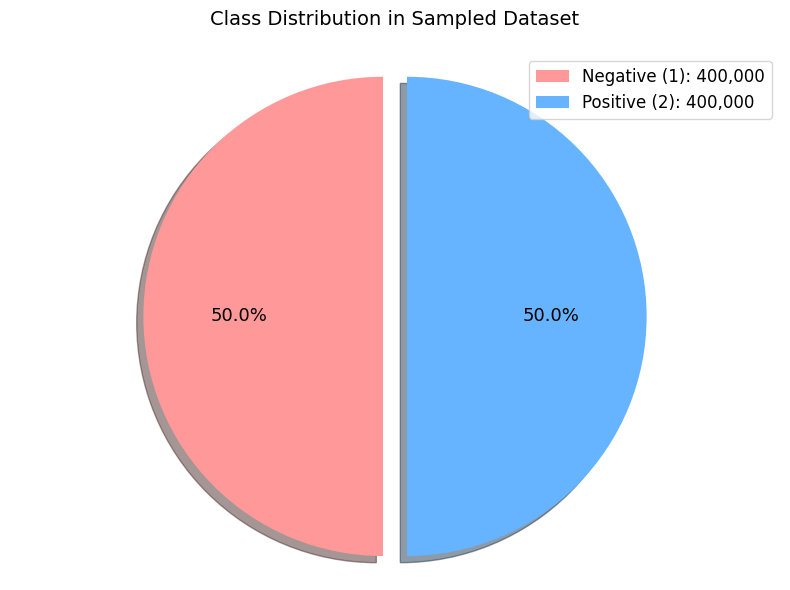

In [23]:
# Create pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
counts = sampled_df['polarity'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0.05)  # Slight separation

patches, texts, autotexts = plt.pie(
    counts, 
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    shadow=True,
    textprops={'fontsize': 13}
)

# Add legend with counts
plt.legend(
    patches,
    [f'Negative (1): {counts[1]:,}', f'Positive (2): {counts[2]:,}'],
    loc="best",
    fontsize=12
)

plt.title('Class Distribution in Sampled Dataset', fontsize=14, pad=20)
plt.axis('equal')  # Ensure circular shape
plt.tight_layout()
plt.show()

In [8]:
from pathlib import Path

# Ensure data folder exists
Path(r"C:\Users\abhis\OneDrive\Desktop\week4\data").mkdir(parents=True, exist_ok=True)

# Save cleaned and sampled dataset with necessary columns only
sampled_df[['cleaned_review', 'title', 'polarity']].to_csv("data/cleaned_sampled_train.csv", index=False)

print("Saved cleaned and sampled training data to data/cleaned_sampled_train.csv")


Saved cleaned and sampled training data to data/cleaned_sampled_train.csv
